# Kaya Han Taş - 15064735

# Extreme Astrophysics Problem Set 1:
### Write a code to calculate and plot the (rest frame) CMB Planck Spectrum as a function of frequency $B_{\nu}(T)$.
### Verify your code by checking that the Peak falls at the Frequency you would expect it to. 
### Make sure to use physical cgs units (i.e., frequency in Hz on the x-axis, Intensity units in cgs on the y-axis) and label your axes properly!
### Add a few additional temperature curves in other colors and label the curves.

* First, let's define our Planck Function.
* For this, we can use the astropy library since we will need a lot of Astrophysical constants such as h, k and c.

In [46]:
#First let's define our constants in Planck Function
speed_of_light = 29979245800.0 #[cm/sec]
boltzmann_constant = 1.380649e-16 #[erg/K]
planck_constant = 6.62607015e-27 #[erg/sec]

#Now we define our Planck Function.
#We import matplotlib for plotting purposes.
import matplotlib.pyplot as plt

#We also import numpy for our mathematical calculations.
import numpy as np

def Planck_Function(frequencies, temperature):
    #First term of Planck Function
    planck_1 = (2*planck_constant*pow(frequencies,3))/pow(speed_of_light,2)
    
    #Second term of Planck Function
    planck_2 = 1/(np.exp((planck_constant*frequencies)/(boltzmann_constant*temperature))-1)
    
    #We multiply both terms to find our planck function.
    planck_func = planck_1 * planck_2
    
    return planck_func

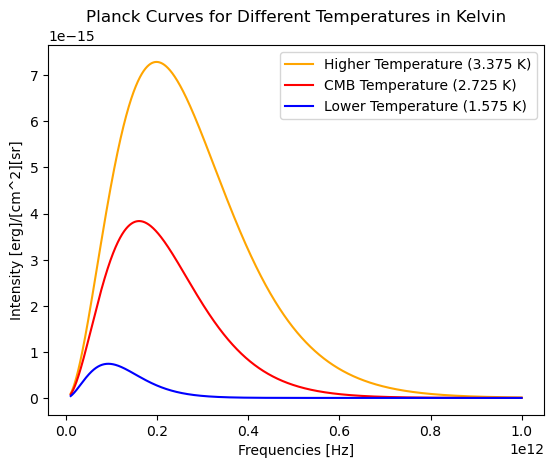

In [89]:
#Now we define a range for our frequencies in terms of Hz. 
frequencies = np.arange(1e10, 1e12, 1e5)

#Now let's plot our Planck Functions.
plt.figure() #Creating the figure

#We plot our Planck Functions for different Temperatures.
#For Temperature higher than CMB Temperature (3.375 K)
plt.plot(frequencies, Planck_Function(frequencies, 3.375), color="orange", label = "Higher Temperature (3.375 K)")

#For CMB Temperature (2.725 K)
plt.plot(frequencies, Planck_Function(frequencies, 2.725), color="red", label = "CMB Temperature (2.725 K)")

#For Temperature lower than CMB Temperature (1.575 K)
plt.plot(frequencies, Planck_Function(frequencies, 1.575), color="blue", label = "Lower Temperature (1.575 K)")

#We also add Labels and Title.
plt.title("Planck Curves for Different Temperatures in Kelvin")
plt.xlabel("Frequencies [Hz]")
plt.ylabel("Intensity [erg]/[cm^2][sr]")

#We also add a Legend to show our labels for different temperatures.
plt.legend(loc = "upper right")
    
plt.show()

In [90]:
#Lastly, let's check if our results make sense.
#We'll compare the Peak Frequency we get from Wien's Law with the Peak Frequency
#of our Planck Function.

#For this, we first find the "index" where Planck Function is maximum.
#That way, using that index, we can find the peak's frequency!
#We first calculate our Planck Function.
CMB_Planck = Planck_Function(frequencies, 2.725)

#Then we check the maximum of our Planck Function.
max_index = np.where(CMB_Planck == max(CMB_Planck))

#Then we find the Maximum Peak's frequency!
max_of_planck = frequencies[max_index]

#We find the Maximum Peak's Frequency by using Wien's Law as well!
max_of_wien = (2.82 * boltzmann_constant * 2.725)/planck_constant

#We print our results.
print("Peak Frequency according to the Planck Function we defined: ", float(max_of_planck), "Hz")
print("Peak Frequency according to the Wien's Law: ", max_of_wien, "Hz")
print(50*"-")
print("The difference between two frequencies: ", abs(max_of_planck - max_of_wien))
print("Note: The difference is high due to the step value of the frequencies.")

Peak Frequency according to the Planck Function we defined:  160200700000.0 Hz
Peak Frequency according to the Wien's Law:  160118999653.21075 Hz
--------------------------------------------------
The difference between two frequencies:  [81700346.7892456]
Note: The difference is high due to the step value of the frequencies.
